<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_paper_fev_2021/blob/main/defesa/PSD_histogram_BEST_sample_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import sklearn
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from sklearn.metrics import r2_score
from google.colab import files

In [ ]:
Repetir = 40

In [ ]:
# New version change routine inside MarquesGabi_Routines
# Try to improve segmentation 
# New routine is called Segment_Filter_revisited_One... Two,Three, etc
# this exemple threshold 0.4


In [ ]:
#!pip install mahotas

In [ ]:
def BlackWhite(Transfere,Size):

  img_name=[]
  xw=[]
  ww=[]

  with zipfile.ZipFile(Transfere, "r") as f:
    for name in f.namelist():
      img_name.append(name)
      #xw.append(cv2.imread(name))
      xw.append(cv2.resize(cv2.imread(name),(Size,Size)))

  nrow=len(img_name)
  ncol=Size*Size
  pw=np.zeros((nrow,ncol))
  #pw=[]
  for i in range(nrow):
    ww.append(cv2.cvtColor(np.array(xw[i]), cv2.COLOR_BGR2GRAY))
    pw[i,:]=ww[i].ravel()
  return ww,img_name

In [ ]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Transfere='Fotos_Grandes_3cdAmostra.zip' 
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

Cloning into 'Doutorado'...
remote: Enumerating objects: 464, done.
remote: Counting objects: 100% (214/214), done.
remote: Compressing objects: 100% (213/213), done.
remote: Total 464 (delta 102), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (464/464), 203.28 MiB | 18.37 MiB/s, done.
Resolving deltas: 100% (219/219), done.
/content/Doutorado


In [ ]:
labels =[]
with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    labels.append(f)
print(labels)

['Fotos_Grandes-3cdAmostra/Q6-8-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-5-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-7-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-8-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-3-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-7-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-4-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-9-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-2-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-8-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-9-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-1-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-6-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-3-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-1-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-6-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-4-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-7-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-2-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-9-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-1-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-6-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-2-1.jpg', 'Fotos_Grandes-3cdAmostra/Q6-5-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-4-1.jpg', 'Fotos_Grandes-3cdAmostr

In [ ]:
Size=1200 # tamanho da foto
ww,img_name=BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
# this is the big image we want to segment 
# ww[0], change it if you want to segment another picture

In [ ]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

Cloning into 'MarquesGabi_Routines'...
remote: Enumerating objects: 207, done.
remote: Counting objects: 100% (207/207), done.
remote: Compressing objects: 100% (204/204), done.
remote: Total 207 (delta 88), reused 3 (delta 1), pack-reused 0
Receiving objects: 100% (207/207), 211.76 MiB | 20.58 MiB/s, done.
Resolving deltas: 100% (88/88), done.
Checking out files: 100% (54/54), done.
/content/Doutorado/MarquesGabi_Routines


In [ ]:
# Sample7 =[2, 5, 17] # 
# [2, 5, 17] sample 7---  [4,13,25] sample 3----[0, 3, 9] sample 8

In [ ]:
FILE='SugarSample07.zip'
img_name=[]
x_original = [] 

data_file ='csv'


file_name = zipfile.ZipFile(FILE, 'r')
file_name.extractall()

k = 0
with zipfile.ZipFile(FILE, "r") as f:
    for name in f.namelist():
      if(name[-3:] == data_file):
        df_ImgJ =pd.read_csv(name)
        if( k > 0):
          df_old = df_ImgJ.copy()
        #df_ImgJ = pd.read_excel(name)
        df_ImgJ =pd.read_csv(name)
        df_ImgJ = df_ImgJ.drop(labels=[0], axis=0)
        if(k > 0):
          df_ImgJ = pd.concat( [df_ImgJ, df_old], ignore_index = True)
        k = k + 1

In [ ]:
df_ImgJ.head()

,,Area,Mean,Min,Max,Major,Minor,Angle,Feret,FeretX,FeretY,FeretAngle,MinFeret
0,2,1.662,255,255,255,1.552,1.363,73.598,1.676,1459,452,77.989,1.372
1,3,1.104,255,255,255,1.412,0.995,28.297,1.464,1560,393,32.838,0.949
2,4,0.721,255,255,255,1.155,0.795,85.374,1.145,836,418,82.117,0.781
3,5,1.361,255,255,255,1.473,1.176,86.059,1.603,1154,296,116.844,1.176
4,6,1.332,255,255,255,1.363,1.244,61.471,1.574,957,409,21.448,1.161


In [ ]:
name

'Amostra 07 foto 04.csv'

In [ ]:
f.namelist()

['Amostra 07 foto 02.csv', 'Amostra 07 foto 03.csv', 'Amostra 07 foto 04.csv']

In [ ]:
#df_ImgJ.head()

In [ ]:
#df_ImgJ.head()

In [ ]:
from Segment_Filter_Revival import Segmenta  # got image provided segmented

In [ ]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

Cloning into 'MarquesGabi_Routines'...
remote: Enumerating objects: 207, done.
remote: Counting objects: 100% (207/207), done.
remote: Compressing objects: 100% (205/205), done.
remote: Total 207 (delta 88), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (207/207), 211.76 MiB | 20.12 MiB/s, done.
Resolving deltas: 100% (88/88), done.
Checking out files: 100% (54/54), done.
/content/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines


In [ ]:
# leitura dos dados
df=pd.read_excel("FotosTreinoRede.xlsx")
y = df['y']
df.drop(['Unnamed: 0','y'], axis='columns', inplace=True)

In [ ]:
X =np.array(df.copy())/255.0 


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42)

In [ ]:
Img_Size = 28

In [ ]:
# helper
def ynindicator(Y):
  N = len(Y)
  K = len(set(Y))
  I = np.zeros((N, K))
  I[np.arange(N), Y] = 1
  return I

def yback(Y_test):
  nrow, ncol = Y_test.shape
  y_class = np.zeros(nrow,dtype=int)
  y_resp = Y_test
  for k in range(nrow):
    for kk in range(K):
      if(y_resp[k,kk] == 1):
        y_class[k] = kk
  Y_test = y_class.copy()
  return Y_test

X_train = np.array(X_train)
Y_train = np.array(Y_train)
K = len(set(Y_train))

X_train = X_train.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_train = Y_train.astype(np.int32)
Y_train = ynindicator(Y_train)

X_test = np.array(X_test )
Y_test = np.array(Y_test)
X_test = X_test.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_test = Y_test.astype(np.int32)
Y_test = ynindicator(Y_test)

# the model will be a sequence of layers

Description = '3 layers of Convolution: 64, 128, 256 '
N1 = 20
N2 = 20

# make the CNN
model = Sequential()
model.add(Conv2D(input_shape=(Img_Size, Img_Size, 1), filters=64, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=128, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=256, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(units=N1))
model.add(Dropout(0.2))
model.add(Dense(units=N2))
model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Dense(units=K))
model.add(Activation('softmax'))


# list of losses: https://keras.io/losses/
# list of optimizers: https://keras.io/optimizers/
# list of metrics: https://keras.io/metrics/
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# training the model
r = model.fit(X_train, Y_train, validation_data=(X_test,Y_test), 
              epochs=200, batch_size=32)

Epoch 1/200
11/11 [==============================] - 2s 107ms/step - loss: 0.5581 - accuracy: 0.7026 - val_loss: 0.6933 - val_accuracy: 0.4898
Epoch 2/200
11/11 [==============================] - 1s 84ms/step - loss: 0.3931 - accuracy: 0.8163 - val_loss: 0.6928 - val_accuracy: 0.5102
Epoch 3/200
11/11 [==============================] - 1s 84ms/step - loss: 0.2798 - accuracy: 0.9155 - val_loss: 0.6930 - val_accuracy: 0.5102
Epoch 4/200
11/11 [==============================] - 1s 84ms/step - loss: 0.1572 - accuracy: 0.9359 - val_loss: 0.6940 - val_accuracy: 0.5102
Epoch 5/200
11/11 [==============================] - 1s 83ms/step - loss: 0.0994 - accuracy: 0.9679 - val_loss: 0.6962 - val_accuracy: 0.5102
Epoch 6/200
11/11 [==============================] - 1s 84ms/step - loss: 0.0905 - accuracy: 0.9621 - val_loss: 0.6994 - val_accuracy: 0.5102
Epoch 7/200
11/11 [==============================] - 1s 83ms/step - loss: 0.0513 - accuracy: 0.9825 - val_loss: 0.6994 - val_accuracy: 0.5102
Epoch

In [ ]:
Y_test = yback(Y_test)

In [ ]:
# pred_test= model.predict_classes(X_test)
pred_test = np.argmax(model.predict(X_test), axis=-1)

data = {'y_true': Y_test,'y_predict': pred_test}  # este dado esta no formato de dicionario

df = pd.DataFrame(data, columns=['y_true','y_predict'])


confusion_matrix = pd.crosstab(df['y_true'], df['y_predict'], rownames=['Actual'], colnames=['Predict'])
print(confusion_matrix)

y_true = df['y_true']
y_pred = df['y_predict']

  
METRICS=sklearn.metrics.classification_report(y_true, y_pred)

Predict   0   1
Actual         
0        64   8
1         1  74


In [ ]:
print(METRICS)

              precision    recall  f1-score   support

           0       0.98      0.89      0.93        72
           1       0.90      0.99      0.94        75

    accuracy                           0.94       147
   macro avg       0.94      0.94      0.94       147
weighted avg       0.94      0.94      0.94       147



In [ ]:
pred_test

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1])

In [ ]:
'''
img=ww[4] 
df=Segmenta(img)
df.shape
'''

'\nimg=ww[4] \ndf=Segmenta(img)\ndf.shape\n'

In [ ]:
Sample3 =[4,13,25]
Sample7 =[2, 5, 17]
Sample8 =[0, 3, 9]

for i in range(Repetir):
  k = 0
  for i in Sample7:
    img=ww[i]
    if( k > 0):
      df_old = df_ann.copy()
    df_ann=Segmenta(img)
    if(k > 0):
      df_ann = pd.concat( [df_ann, df_old], ignore_index = True)
    k = k + 1
#df_ann = df.copy

df_teste = np.array(df_ann)
names = df_ann.columns
df_teste = pd.DataFrame(df_teste,columns=names)
Width = df_ann['Width']
#del df_ann['Width']
names = df_ann.columns
del df_ann['Width']
result = np.array(df_ann)
result = result.reshape(-1, Img_Size, Img_Size, 1) / 255.0
prediction= np.argmax(model.predict(result), axis=-1)

In [ ]:
df_ann

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,166.370361,169.012360,177.777786,177.604935,175.962952,173.518509,171.074081,171.592590,176.679016,177.024689,176.641968,177.975311,176.777771,174.259277,171.617294,170.679031,169.148132,165.567902,158.370377,154.395065,147.716049,137.444443,140.111115,144.135818,146.061752,152.753098,156.876541,153.320984,159.333344,162.074081,173.012360,174.617294,175.765442,175.246918,172.283951,171.123459,173.148163,172.308640,171.901245,172.543213,...,196.135818,178.333328,139.827164,137.432098,140.666672,144.197525,148.481491,151.938263,155.987671,156.506180,152.592606,150.814804,130.777771,152.037048,160.629639,168.654327,171.382721,169.654327,170.876541,173.567917,176.407410,182.061737,187.185196,193.827164,200.283966,204.580246,209.950623,205.382706,195.493835,162.580246,132.987671,135.629639,138.962967,132.962967,139.049393,147.641968,149.567917,139.814819,138.913574,152.049393
1,94.121094,103.191956,111.723953,111.343803,105.236504,99.726082,100.092033,97.859428,89.081970,84.065491,80.636230,77.990341,74.660248,77.869247,86.169388,92.370667,94.612045,94.957642,91.450043,85.947891,64.970047,45.747101,48.379513,45.163380,44.086197,90.217674,130.135544,123.723244,97.147629,106.561966,113.139923,110.825500,107.277252,101.301270,101.658142,94.116219,76.188049,77.474640,80.244705,81.388107,...,123.593048,123.419853,122.680870,123.621056,126.386497,127.430397,127.650826,126.650757,125.110542,122.821106,116.909416,116.677299,75.256310,80.300217,84.697510,82.564888,52.591187,17.735737,18.317913,19.985634,32.699944,76.521217,107.065987,121.706512,109.433731,124.461082,123.955528,124.282608,125.192932,125.593376,123.896194,125.589561,127.800499,129.899521,129.869492,126.785484,123.023048,119.521393,117.627380,119.763580
2,49.925179,51.583050,52.538597,50.756668,49.730778,49.167568,47.691105,46.707554,46.618423,46.426777,45.957733,45.849785,46.009823,45.293274,46.546352,112.444199,152.337677,155.499954,152.330872,149.370880,146.217163,144.843613,146.333511,147.561096,146.462234,144.796539,142.917938,141.929886,50.402351,51.940983,51.669765,50.162292,49.984760,48.210205,46.040157,45.242390,45.546879,45.093868,46.557232,46.123337,...,56.951374,51.023407,40.830669,25.169634,10.907713,3.834808,1.696940,1.207874,1.010162,1.018518,0.877414,1.026459,44.030113,68.192932,76.651474,78.236786,77.235420,69.626480,53.960560,27.975309,10.074711,4.688434,8.906658,26.074936,37.958565,46.557301,46.105835,40.196918,26.410217,13.942302,5.648688,2.077986,1.204750,0.637472,0.103655,0.809816,0.183259,0.108209,0.354323,0.995672
3,103.842148,103.248375,126.844299,146.415527,147.325714,146.270660,147.531403,148.403030,149.715179,146.375198,144.202225,142.019379,144.264526,145.578766,145.623444,152.943558,162.287628,157.748962,155.132889,152.683884,150.484970,146.919678,136.321274,114.663254,105.689445,102.328842,101.965523,105.731491,98.852722,80.634804,107.868347,145.153458,147.658813,145.063293,141.737900,135.854416,138.329590,139.501190,142.596680,143.423050,...,155.911255,157.446411,154.516129,132.634155,103.499115,92.581360,84.650345,84.872398,90.871315,94.614174,94.656479,93.672928,132.957397,137.560349,136.345261,125.859497,121.051155,125.374382,124.482178,125.714355,125.661148,128.029007,135.057251,140.313217,145.630203,147.752670,155.859314,162.488312,162.452423,155.707718,138.421356,118.224060,116.392334,114.654297,106.280441,85.523918,87.821449,92.786629,93.450111,93.572968
4,3.755098,66.032669,84.639793,90.463043,86.331017,84.246811,88.337135,92.097801,93.437035,94.659103,92.728294,91.263580,92.080383,93.701698,93.122009,92.984001,92.833626,91.576836,91.851471,92.059990,93.910164,101.062103,104.828255,83.589561,30.861801,41.144066,38.727371,35.288570,1.309306,50.612156,84.631859,92.800

In [ ]:
df_teste.shape # por que esta saindo 100 ???????

(150, 785)

In [ ]:
#df_ann

In [ ]:
img_graos = []
Width_new = []
k = 0
for i in prediction:
  if( i == 0):
    img_graos.append(df_teste.iloc[k,:])
    Width_new.append(Width.iloc[k])

  k = k +1

img_graos = pd.DataFrame(img_graos, columns=names )


In [ ]:
img_graos.shape

(72, 785)

In [ ]:
prediction

array([1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [ ]:
img_graos.shape

(72, 785)

In [ ]:
Width=np.array(Width_new)

In [ ]:
!git clone https://github.com/ucfilho/marquesgabi_paper_fev_2021
%cd marquesgabi_paper_fev_2021

from Get_PSDArea_Revival import PSDArea
from histogram_fev_2021 import PSD
#from GetBetterSegm import GetBetter

Cloning into 'marquesgabi_paper_fev_2021'...
remote: Enumerating objects: 847, done.
remote: Counting objects: 100% (608/608), done.
remote: Compressing objects: 100% (606/606), done.
remote: Total 847 (delta 399), reused 0 (delta 0), pack-reused 239
Receiving objects: 100% (847/847), 6.32 MiB | 9.21 MiB/s, done.
Resolving deltas: 100% (536/536), done.
/content/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021


In [ ]:

#!git clone https://github.com/ucfilho/marquesgabi_out_2020
#%cd marquesgabi_out_2020
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

PSD_imageJ = 'Amostra7.csv' 
PSD_new = pd.read_csv(PSD_imageJ, sep=';')
print(PSD_new.head(3))
''''''

Cloning into 'MarquesGabi_Routines'...
remote: Enumerating objects: 211, done.
remote: Counting objects: 100% (211/211), done.
remote: Compressing objects: 100% (209/209), done.
remote: Total 211 (delta 89), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (211/211), 211.76 MiB | 19.88 MiB/s, done.
Resolving deltas: 100% (89/89), done.
Checking out files: 100% (55/55), done.
/content/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/MarquesGabi_Routines
   Id   Area
0   1  1.387
1   2  1.626
2   3  1.336


''

In [ ]:
Area_All, Diameter_All=PSDArea(img_graos) 

In [ ]:
Width.shape

(72,)

In [ ]:
Width

array([111, 163, 160, 111, 176, 150, 123, 182, 112, 121, 104, 117, 160,
       123, 136, 103, 147, 116, 178, 163, 179, 169, 176, 163, 183, 188,
       127, 112, 167, 150, 191, 124, 174, 101, 143, 160, 183, 172, 178,
       102, 187, 182, 134, 102, 170, 113, 145, 110, 185, 100, 162, 101,
       143, 100, 162, 168, 128, 144, 199, 119, 180, 155, 182, 152, 109,
       112, 123, 187, 182, 181, 151, 129])

In [ ]:
img_graos.shape

(72, 785)

In [ ]:
img_graos.head()

,Width,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
1,111.0,94.121094,103.191956,111.723953,111.343803,105.236504,99.726082,100.092033,97.859428,89.081970,84.065491,80.636230,77.990341,74.660248,77.869247,86.169388,92.370667,94.612045,94.957642,91.450043,85.947891,64.970047,45.747101,48.379513,45.163380,44.086197,90.217674,130.135544,123.723244,97.147629,106.561966,113.139923,110.825500,107.277252,101.301270,101.658142,94.116219,76.188049,77.474640,80.244705,...,123.593048,123.419853,122.680870,123.621056,126.386497,127.430397,127.650826,126.650757,125.110542,122.821106,116.909416,116.677299,75.256310,80.300217,84.697510,82.564888,52.591187,17.735737,18.317913,19.985634,32.699944,76.521217,107.065987,121.706512,109.433731,124.461082,123.955528,124.282608,125.192932,125.593376,123.896194,125.589561,127.800499,129.899521,129.869492,126.785484,123.023048,119.521393,117.627380,119.763580
2,163.0,49.925179,51.583050,52.538597,50.756668,49.730778,49.167568,47.691105,46.707554,46.618423,46.426777,45.957733,45.849785,46.009823,45.293274,46.546352,112.444199,152.337677,155.499954,152.330872,149.370880,146.217163,144.843613,146.333511,147.561096,146.462234,144.796539,142.917938,141.929886,50.402351,51.940983,51.669765,50.162292,49.984760,48.210205,46.040157,45.242390,45.546879,45.093868,46.557232,...,56.951374,51.023407,40.830669,25.169634,10.907713,3.834808,1.696940,1.207874,1.010162,1.018518,0.877414,1.026459,44.030113,68.192932,76.651474,78.236786,77.235420,69.626480,53.960560,27.975309,10.074711,4.688434,8.906658,26.074936,37.958565,46.557301,46.105835,40.196918,26.410217,13.942302,5.648688,2.077986,1.204750,0.637472,0.103655,0.809816,0.183259,0.108209,0.354323,0.995672
6,160.0,90.354378,90.855003,90.863747,93.286873,91.039368,83.253128,60.501251,32.401875,32.294376,36.150623,34.026249,26.929998,54.145622,105.425629,116.680626,120.904991,120.426247,119.698746,122.038742,121.828125,113.666870,94.187500,70.341873,124.518120,129.748749,131.083130,131.600616,131.946243,89.420624,85.479378,84.521873,93.493126,94.369995,90.656876,78.184998,37.548122,32.991249,33.811249,33.539375,...,128.468750,128.866867,126.643127,128.996872,145.872498,144.958130,119.788124,118.636871,115.814369,109.955620,106.358749,96.374374,116.032501,115.510620,113.158119,115.597496,114.324371,113.103119,115.479988,113.868118,113.380630,115.206253,113.659996,113.537498,120.219368,123.042488,126.767487,129.653122,130.737503,131.231873,134.330627,137.906250,145.688736,138.023117,111.852501,118.434372,118.388748,110.488129,110.832497,103.801239
12,111.0,72.573090,85.250954,88.967209,94.094070,94.959984,93.962021,92.740448,95.105675,96.230827,97.494850,100.178467,103.234718,108.104210,109.014694,108.852280,108.728592,109.088707,104.852203,95.181320,84.886368,70.092125,69.499634,101.862747,125.660500,127.722664,126.925812,125.286667,124.418396,63.917946,84.376999,97.041718,100.174255,99.461731,98.876709,96.692390,107.616989,112.003403,109.993668,104.889618,...,57.544189,59.106239,61.987747,63.383087,64.431458,64.307274,67.682007,77.227165,88.833702,94.034569,96.365555,103.878906,52.856991,64.725998,66.817627,63.722424,63.211346,63.159077,64.341370,63.468224,63.835648,65.693123,69.635498,73.954468,74.137321,71.963806,65.545326,62.225792,61.437710,62.462135,63.522522,63.900742,64.445908,63.943836,62.517162,67.752617,80.976875,89.797256,96.370102,111.283173
15,176.0,163.067673,168.686447,170.403915,194.317657,203.515503,200.313522,198.806274,195.945251,185.469009,159.160645,128.454529,86.429749,62.586777,65.248451,65.071793,66.550102,92.717453,121.713318,126.819740,154.129639,156.961777,142.490707,103.991226,119.575409,156.348145,168.177673,166.298553,162.308884,154.331100,170.474167,179.113113,195.157013,199.572311,188.389450,161.906006,133.096588,108.

In [ ]:
PSD_new['Area']

0      1.387
1      1.626
2      1.336
3      0.640
4      2.211
       ...  
97     1.297
98     2.949
99     1.090
100    1.444
101    1.524
Name: Area, Length: 102, dtype: float64

In [ ]:
# 
Area = df_ImgJ['Area'].values
# Area = np.concatenate( (Area, [lost_value] ) )

Diam1 = [ (4*A/np.pi)**0.5 for A in Area]



In [ ]:
len(Diameter_All)

72

In [ ]:
#

#PSD_new['Area'].shape

In [ ]:
#PSD_new.iloc[:,0]

In [ ]:
Area2 = PSD_new['Area'].values
#k = 0
for A in Area2:
  Diam1.append((4*A/np.pi)**0.5)
  #k = k + 1 


In [ ]:
wt1 = np.ones(len(Diam1)) / len(Diam1)*100
wt2 = np.ones(len(Diameter_All)) / len(Diameter_All)*100
X = pd.DataFrame([Diam1,Diameter_All])
wts = pd.DataFrame([wt1,wt2])


In [ ]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188
0,1.454690,1.185604,0.958126,1.316389,1.302288,1.149618,1.305706,1.207418,1.475547,1.381977,1.152384,1.560675,1.438849,1.269615,1.680111,1.145736,1.292474,1.903586,1.490144,1.134568,1.209526,1.155143,1.339876,0.973942,1.643332,1.342724,1.33845,1.570029,1.251433,1.269615,1.543035,1.917581,1.284569,1.118747,1.047632,1.065706,1.210578,1.978046,1.078178,1.213729,...,1.800817,1.573674,1.429973,2.105569,1.495262,1.362024,1.540558,1.522685,1.293459,1.477703,1.136811,1.308628,1.269113,1.532271,1.333208,1.507558,1.468628,1.341301,1.31977,1.677456,1.147401,1.319287,1.572865,1.132884,1.276117,1.417902,1.355934,1.546744,1.366224,1.656067,1.511354,2.002356,1.54839,1.467761,1.216872,1.285065,1.937726,1.178062,1.355934,1.392989
1,0.801865,1.290704,1.070767,0.689234,1.308829,1.087638,0.711837,1.322109,0.679454,0.653946,0.479135,0.764045,0.934007,0.975478,0.896195,0.669543,1.011187,0.509315,0.922722,1.162034,1.041931,1.101098,1.188042,1.027339,1.341581,1.455943,0.75605,0.611329,1.072990,1.065252,1.032262,0.667922,1.182047,0.645866,0.903492,1.162293,1.530064,1.197676,1.234467,0.585133,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
len(Diameter_All)

72

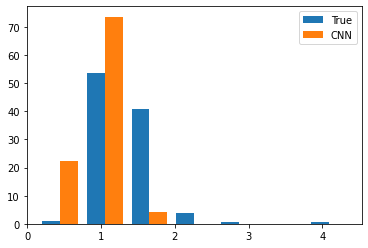

In [ ]:
A = plt.hist(X,weights=wts,bins=7)
plt.legend(['True','CNN'])

In [ ]:
print('ImgJ:','media=',np.mean(np.array(Diam1)),'desvio=',np.std(np.array(Diam1)),'pontos=',len(Diam1))

ImgJ: media= 1.3931484341131954 desvio= 0.3634548348598306 pontos= 189


In [ ]:
print('Software:','media=',np.mean(np.array(Diameter_All)),'desvio=',np.std(np.array(Diameter_All)),'pontos=',len(Diameter_All))

Software: media= 0.970599583674568 desvio= 0.2530083923435565 pontos= 72
